# Regularisation

## First - Synthesised data and Ridge Regression

In this first example, we will look at synthesised data and see how ridge regression compares with linear regression

Step 1: Import necessary libraries

In [63]:
# Import libraries for data manipulation, visualization, and machine learning
import numpy as np                     # For numerical operations and random samples
import pandas as pd                    # For data manipulation, DataFrames
import matplotlib.pyplot as plt        # For plotting and visualizations
from sklearn.datasets import make_regression # For generating synthetic regression data
from sklearn.model_selection import train_test_split # For splitting data into train and test sets
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV # For regression models
from sklearn.metrics import mean_squared_error     # For evaluating model performance (MSE)
import seaborn as sns                 # For enhanced data visualization (heatmaps, plots)


Synthesize a dataset with make_regression (https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_regression.html) and split the data into training and testing sets.

I'm doing a bit of a fix here with random_state = 20. Also doing some rigging here with test_size=0.85 to demonstrate high variance. This sensitivity to the training data will be mitigated by increasing bias (the ridge regression penalty) to reduce the model variance.

In [64]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=20)  #Bit of a fix going on here with random_state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)  #Also doing some rigging here with test_size=0.85 to demonstrate high variance 

Initialize and train the Linear Regression and Ridge Regression models.<br>
With Ridge Regression, use cross-validation for tuning lambda (Note: the word lambda is reserved by the Python language, so alpha is used instead)<br>
Next, make predictions using both models and evaluate performance using Mean Squared Error (MSE)

### Model Training and Evaluation with Linear and Ridge Regression to find Regularisation ($\lambda$) hyper-parameter

This code trains and evaluates **Linear Regression** and **Ridge Regression** models (with cross-validation), comparing their performance using **Mean Squared Error (MSE)** on a test dataset.
>Lambda (λ) is a hyperparameter. In Ridge Regression, it’s named as alpha (α) and controls regularization strength to prevent overfitting.
###### (note, naming Regularisation parameter: skLearn uses alpha for lambda ($\lambda$) due to python's rerstriction on lambda for lambda functions)

In [65]:
# Model Training and Evaluation with Linear and Ridge Regression

# Initialise 
lr = LinearRegression() # Initialise basic Linear Regression model.
alphas = np.logspace(-4, 4, 9)  # Define a range of potential values for Ridge’s Regularization Parameter (alpha instead of lambda in python)
rr_cv = RidgeCV(alphas=alphas, cv=5)  # Initialise Ridge Regression with 5-fold cross-validation to find the optimal value for alpha

# Train Models
rr_cv.fit(X_train, y_train) # Train the Ridge model on the training data and determine the best regulasation (alpha) value.
lr.fit(X_train, y_train) # Train the Linear model for reference
# Make predictions
rr_pred = rr_cv.predict(X_test) # predict with the Ridge Regression model)
lr_pred = lr.predict(X_test) # predict with the Linear model

# Evaluate performance with Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, lr_pred)
rr_mse = mean_squared_error(y_test, rr_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter

Linear Regression MSE (test set): 450.17
Ridge Regression MSE (test set): 448.33
Best alpha (lambda) for Ridge Regression: 1.00000


Next, let's have a look at the coefficients for both models. As expected, the penalty term has made the coefficients smaller (meaning they're slightly less sensitive to the inputs)

In [66]:
# Displaying the coefficients and intercepts of the trained models In a linear equation y=mx+b b is the intercept (bias), w is the coefficient (weight)


# Linear Regression coefficients and intercept
print("\nLinear regression coefficient:", lr.coef_)  # Displays the coefficients (weights) for Linear Regression
print("Linear regression intercept:", lr.intercept_)  # Displays the intercept (bias) for Linear Regression

# Ridge Regression coefficients and intercept
print("\nRidge regression coefficient:", rr_cv.coef_)  # Displays the coefficients (weights) for Ridge Regression
print("Ridge regression intercept:", rr_cv.intercept_)  # Displays the intercept (bias) for Ridge Regression



Linear regression coefficient: [97.74253971]
Linear regression intercept: 1.4230434087617017

Ridge regression coefficient: [94.35834942]
Ridge regression intercept: 1.1514384996764147


### Plot the results

As expected the slope for ridge regression is less than that of linear regression. We can also see that the performance is better but that's been fixed above. In general, in simple cases like this, the ridge regression penalty just makes MSE worse

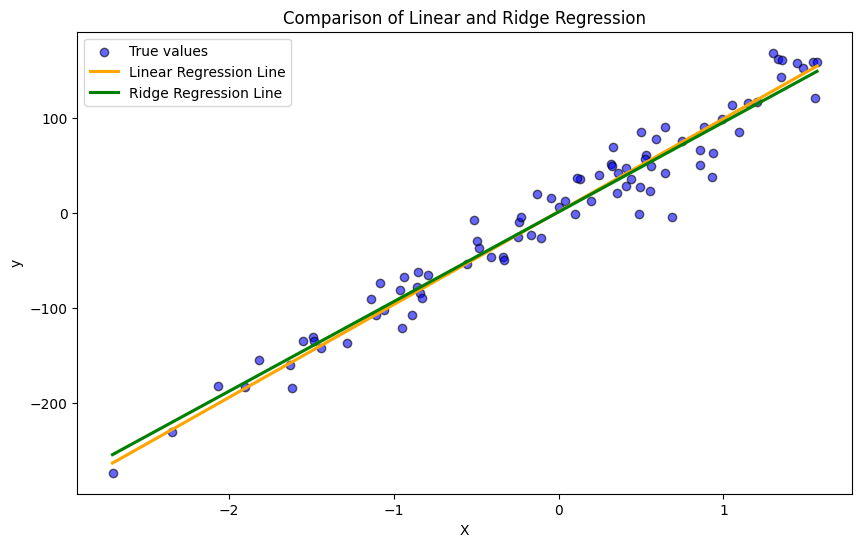

In [67]:
# Visualise results

plt.figure(figsize=(10, 6))

# Scatter plot of the true values vs predicted values 
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='True values', edgecolors='k')

# Adding the Linear Regression Line 
sns.regplot(x=X_test.flatten(), y=lr_pred, scatter=False, color='orange', label='Linear Regression Line')

# Adding the Ridge Regression Line 
sns.regplot(x=X_test.flatten(), y=rr_pred, scatter=False, color='green', label='Ridge Regression Line')


plt.title('Comparison of Linear and Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# ----------------------------------------

## A more real-world example - Diabetes Dataset again

In this example, we'll look again at the Diabetes dataset in sklearn and the impact Ridge Regression has
###### https://rowannicholls.github.io/python/data/sklearn_datasets/diabetes.html


Let's load the diabetes dataset and setup X and y. We've seen this before

In [68]:
from sklearn.datasets import load_diabetes # import dianetes dataset

diabetes = load_diabetes() # load dianetes dataset
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) # create dataframe from Diabetes data
y = diabetes.target # set target variable

#noise = np.random.normal(0, 40, size=y.shape)  # add random noise to the target
#y = y + noise

# Split the data into training and test sets, with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.head()) 

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


Same as above, initialize and train the Linear Regression and Ridge Regression models (cross-validation for tuning lambda)

Next, make predictions using both models and evaluate performance using Mean Squared Error (MSE)

In [70]:
lr = LinearRegression()

alphas = np.logspace(-4, 4, 9)  # Range of alpha values (log scale)
rr_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation
rr_cv.fit(X_train, y_train)

# Make predictions
lr_pred = lr.fit(X_train, y_train).predict(X_test)
rr_pred = rr_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, lr_pred)
rr_mse = mean_squared_error(y_test, rr_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter

Linear Regression MSE (test set): 2900.19
Ridge Regression MSE (test set): 2856.49
Best alpha (lambda) for Ridge Regression: 0.10000


Next, let's have a look at the coefficients for both models. As expected again, the penalty term has made the coefficients smaller (meaning they're slightly less sensitive to the inputs). Also, the sum of the coefficients is significantly smaller

In [72]:
#Display the coefficients for both models
sumCoef=0 #his variable will hold the sum of the absolute values of the coefficients.
print("Ridge regression coefficients:")
for feature, coef in zip(X.columns, rr_cv.coef_):
    print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print(sumCoef)

sumCoef=0
print("\nLinear regression coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print(sumCoef)

Ridge regression coefficients:
age: 42.856
sex: -205.494
bmi: 505.089
bp: 317.093
s1: -108.500
s2: -86.237
s3: -190.363
s4: 151.707
s5: 392.289
s6: 79.908
2079.5369844639986

Linear regression coefficients:
age: 37.904
sex: -241.964
bmi: 542.429
bp: 347.704
s1: -931.489
s2: 518.062
s3: 163.420
s4: 275.318
s5: 736.199
s6: 48.671
3843.159509866424


Above output compares feature importance and model sensitivity in both Ridge and Linear Regression.<br>
>In linear models like Linear Regression and Ridge Regression, feature importance is generally determined by the absolute size of the weight (coefficient):
>-   Larger weights (in absolute terms) mean the feature has a bigger impact on the model’s predictions and is considered more important.
>-   Smaller weights mean the feature contributes less to the prediction, so it's less important.

### The output shows:

#### Ridge Regression Coefficients
- Ridge Regression applies **regularization**, which reduces the absolute values of some coefficients to prevent overfitting. The coefficients for some features (like `s1` and `s4`) are notably smaller than in Linear Regression, reflecting Ridge's tendency to “shrink” coefficients.
- The **sum of absolute coefficients (2079.54)** is significantly lower than in Linear Regression, showing that Ridge Regression has successfully reduced the influence of some features.

#### Linear Regression Coefficients
- Linear Regression has **larger coefficient values** (e.g., `s1` at -931.49 and `s5` at 736.20) because it does not use regularization, which can lead to overfitting.
- The **sum of absolute coefficients (3843.16)** is much higher than in Ridge Regression, indicating greater sensitivity to the feature values. This higher sensitivity may reduce model stability if some features have strong multicollinearity or if data is noisy.

#### Overall Comparison
- Ridge Regression **balances feature influence**, reducing the weight of less critical or redundant features.
- Linear Regression coefficients are larger, which can mean the model fits the training data more closely but may generalize poorly.



### Plot the results

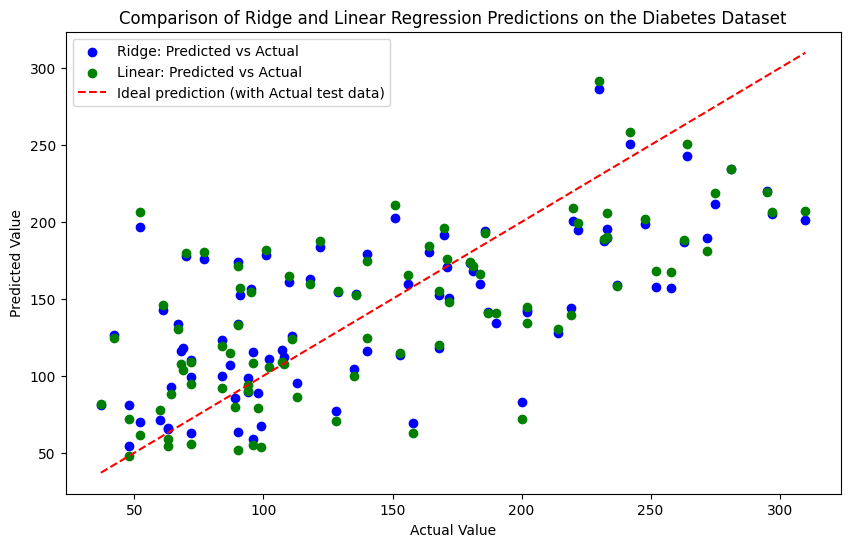

In [80]:
plt.figure(figsize=(10, 6))

# Plotting actual values vs predicted values for both models
plt.scatter(y_test, rr_pred, color='blue', label='Ridge: Predicted vs Actual')
plt.scatter(y_test, lr_pred, color='green', label='Linear: Predicted vs Actual')

# Ideal prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal prediction (with Actual test data)')

plt.title('Comparison of Ridge and Linear Regression Predictions on the Diabetes Dataset')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

## Let's look at Lasso Regularisation with the diabetes dataset

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5) # initiate lassoCV model with 5 fold cross validation
lasso_cv.fit(X_train, y_train) # fit the model with the previously split training data

# Make predictions
lasso_pred = lasso_cv.predict(X_test)
# Evaluate using Mean Squared Error (MSE)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# compare all models 
print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Ridge
print(f"Lasso Regression MSE (test set): {lasso_mse:.2f}")
print(f"Best alpha (lambda) for Lasso Regression: {lasso_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Lasso

Linear Regression MSE (test set): 2900.19
Ridge Regression MSE (test set): 2856.49
Best alpha (lambda) for Ridge Regression: 0.10000
Lasso Regression MSE (test set): 2798.19
Best alpha (lambda) for Lasso Regression: 0.10000


### Plot the results

Let's have a look at the results for all 3 models

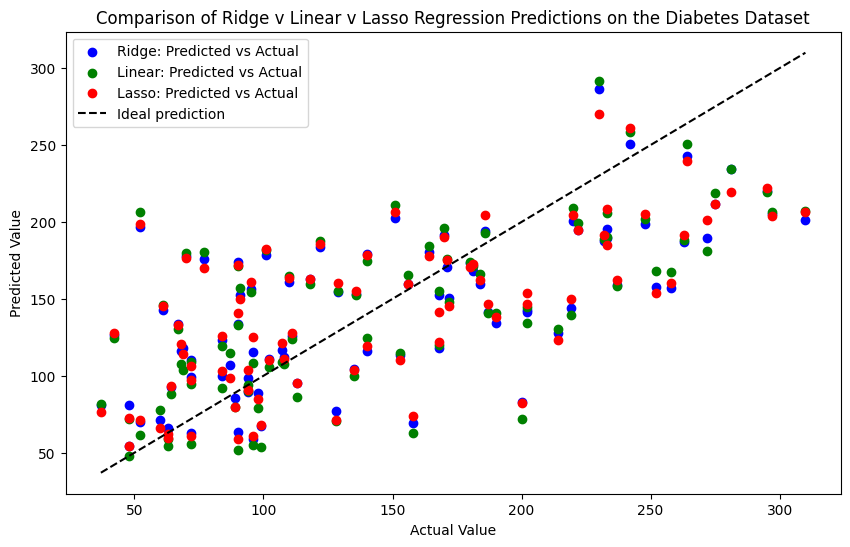

In [75]:
plt.figure(figsize=(10, 6))

# Plotting actual values vs predicted values for all 3 models
plt.scatter(y_test, rr_pred, color='blue', label='Ridge: Predicted vs Actual')
plt.scatter(y_test, lr_pred, color='green', label='Linear: Predicted vs Actual')
plt.scatter(y_test, lasso_pred, color='red', label='Lasso: Predicted vs Actual')

# Ideal prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal prediction')

plt.title('Comparison of Ridge v Linear v Lasso Regression Predictions on the Diabetes Dataset')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

### Types of Regularization Penalties in Regression

Regularization is used in regression models to prevent overfitting by adding penalties to the model's coefficients (or slope ($m$) ). These penalties reduce the complexity of the model and improve its generalization to new data. There are three main types of regularization:

#### 1. **L1 Regularization (Lasso)**
- **What it does**: Adds a penalty to the sum of the absolute values of the coefficients.
- **Effect**: Some coefficients are forced to become **exactly zero**, effectively removing some features from the model (feature selection).
- **Use case**: to simplify the model by eliminating irrelevant features.
- **Loss function**: **Mean Absolute Error (MAE)**, which measures the average of the absolute errors between predicted and actual values.

#### 2. **L2 Regularization (Ridge)**
- **What it does**: Adds a penalty to the sum of the squares of the coefficients.
- **Effect**: Shrinks the coefficients but doesn't make them exactly zero. This reduces the influence of less important features but keeps all of them.
- **Use case**: to prevent overfitting but still keep all features in the model.
- **Loss function**: **Mean Squared Error (MSE)**, which measures the average of the squared differences between predicted and actual values.

#### 3. **ElasticNet**
- **What it does**: Combines both **L1** and **L2** regularization.
- **Effect**: Balances between feature selection (via L1) and shrinking coefficients (via L2).
- **Use case**: to have many correlated features and want to take advantage of both Lasso and Ridge methods.

### Adding noise

Let's go back up to the top now and edit the noise parameter.

Ridge usually performs better when:

- The data has multicollinearity: Features are highly correlated, and ridge can prevent overfitting.
- The dataset has a large number of features (especially when there are more features than data): Regularization helps in controlling complexity, especially when there some irrelevant features.
- The dataset has noise: Ridge can reduce the model's sensitivity to noise.

So, let's introduce some noise

## ElasticNet

ElasticNet is a combination of the L1 and L2 penalties. It defaults to a 50/50 influence in sklearn

In [77]:
from sklearn.linear_model import ElasticNetCV

en_cv = ElasticNetCV(alphas=alphas, cv=5)
en_cv.fit(X_train, y_train)

# Make predictions
en_pred = en_cv.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
en_mse = mean_squared_error(y_test, en_pred)

print(f"Linear Regression MSE (test set): {lr_mse:.2f}")
print(f"Ridge Regression MSE (test set): {rr_mse:.2f}")
print(f"Best alpha (lambda) for Ridge Regression: {rr_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Ridge
print(f"Lasso Regression MSE (test set): {lasso_mse:.2f}")
print(f"Best alpha (lambda) for Lasso Regression: {lasso_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Lasso
print(f"ElasticNet Regression MSE (test set): {en_mse:.2f}")
print(f"Best alpha (lambda) for ElasticNet Regression: {en_cv.alpha_:.5f}") #Query the optimal alpha (lambda) hyper-parameter for Lasso

Linear Regression MSE (test set): 2900.19
Ridge Regression MSE (test set): 2856.49
Best alpha (lambda) for Ridge Regression: 0.10000
Lasso Regression MSE (test set): 2798.19
Best alpha (lambda) for Lasso Regression: 0.10000
ElasticNet Regression MSE (test set): 2877.86
Best alpha (lambda) for ElasticNet Regression: 0.00010


In [78]:
sumCoef=0
#Display the coefficients for all models
for feature, coef in zip(X.columns, rr_cv.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("Ridge regression coefficient sum:")
print(sumCoef)

sumCoef=0
for feature, coef in zip(X.columns, lasso_cv.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("\nLasso regression coefficient sum:")
print(sumCoef)

sumCoef=0
for feature, coef in zip(X.columns, en_cv.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("\nElasticNet regression coefficient sum:")
print(sumCoef)

sumCoef=0
for feature, coef in zip(X.columns, lr.coef_):
    #print(f"{feature}: {coef:.3f}")
    sumCoef += abs(coef)

print("\nLinear regression coefficient sum:")
print(sumCoef)

Ridge regression coefficient sum:
2079.5369844639986

Lasso regression coefficient sum:
1796.9106376774466

ElasticNet regression coefficient sum:
2368.4965524327354

Linear regression coefficient sum:
3843.159509866424



## Finally, Regularisation is built into many models in SKLearn - see below

penalty can be L1, L2 or ElasticNet which is a combination of L1 and L2 penalties

In [81]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices co

### Parameters in `LogisticRegression`

- **penalty**: Specifies the regularization method.
  - `'l2'` means **L2 regularization** (Ridge), which adds a penalty based on the square of the coefficients.

- **dual**: Whether to use the dual formulation (more efficient when the number of samples is much larger than the number of features).
  - Default is `False` for the primal formulation, which is more common for regular cases.

- **tol**: Tolerance for stopping criteria. 
  - If the change in the loss function is less than this value, the solver stops. Default is `0.0001`.

- **C**: Inverse of regularization strength. 
  - Smaller values specify stronger regularization (larger penalty). Default is `1.0`.

- **fit_intercept**: Whether to include an intercept (bias) term in the model.
  - `True` means an intercept will be added, `False` means it won't. Default is `True`.

- **intercept_scaling**: Only used when `fit_intercept=True` and the solver is `liblinear`. 
  - It controls the scaling of the intercept. Default is `1`.

- **class_weight**: Allows you to assign weights to classes. 
  - Can be `None` (equal weight for all classes), a dictionary (specific weights), or `'balanced'` (weights are automatically adjusted inversely proportional to class frequencies).

- **random_state**: Seed for random number generation.
  - Used for reproducibility. Default is `None`, meaning the random state is not fixed.

- **solver**: Algorithm used to optimize the model.
  - Options: `'lbfgs'` (default), `'newton-cg'`, `'liblinear'`, `'saga'`, and `'sag'`. `'lbfgs'` is the default and is generally a good choice for smaller datasets.

- **max_iter**: Maximum number of iterations for the solver.
  - Default is `100`. If the solver hasn't converged by then, it will stop.

- **multi_class**: Specifies the type of multiclass classification.
  - The default `'deprecated'` suggests you should use `solver='lbfgs'` or `solver='saga'` for multiclass problems.

- **verbose**: Controls the verbosity of the solver's output.
  - `0` means no output, `1` means some output, and higher values show more detailed logs.

- **warm_start**: Whether to reuse the solution from the previous fit.
  - `False` means the model will be reinitialized before fitting. If `True`, the model will continue fitting from the previous state, useful for hyperparameter tuning.

- **n_jobs**: Number of CPU cores to use during computation.
  - `None` means it uses 1 core, but you can set it to `-1` to use all available cores.

- **l1_ratio**: The ratio between L1 and L2 regularization (used only if `penalty='elasticnet'`).
  - If `None`, the regularization is fully L2. This parameter is ignored when `penalty='l2'`.
